In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
student = pd.read_csv("Student_v2.csv")


In [3]:
student.head()

,PG_CGA,Year,GMAT score,UG CGPA,Number of friends,Number of classes present,Number of hours studied,Register Number
0,7.6950,1952,605,8.535304,155,32,4.903273,12808ABC
1,8.2393,1953,691,8.752756,82,30,4.513093,13288ABC
2,7.7858,1955,507,8.651894,134,29,5.114469,3438ABC
3,6.9845,1957,423,8.148109,107,26,5.153673,3167ABC
4,6.8772,1958,584,8.519016,192,25,4.583450,2966ABC


 # 1  Detailed EDA (plots, correlations etc.)

plot the graph number_of_hours_studied of the student how much get ug marks 

In [4]:
student.isnull().sum()

PG_CGA                       0
Year                         0
GMAT score                   0
UG CGPA                      0
Number of friends            0
Number of classes present    0
Number of hours studied      0
Register Number              0
dtype: int64

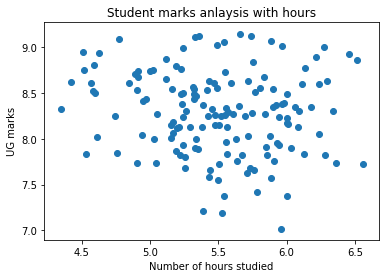

In [5]:
plt.scatter(student['Number of hours studied'],student['UG CGPA'])
plt.xlabel('Number of hours studied')
plt.ylabel('UG marks')
plt.title("Student marks anlaysis with hours")
plt.show()

In [6]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
PG_CGA                       150 non-null float64
Year                         150 non-null int64
GMAT score                   150 non-null int64
UG CGPA                      150 non-null float64
Number of friends            150 non-null int64
Number of classes present    150 non-null int64
Number of hours studied      150 non-null float64
Register Number              150 non-null object
dtypes: float64(3), int64(4), object(1)
memory usage: 9.5+ KB


In [7]:
student.describe()

,PG_CGA,Year,GMAT score,UG CGPA,Number of friends,Number of classes present,Number of hours studied
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,7.077224,1965.800000,608.133333,8.284005,148.186667,17.240000,5.491061
std,0.679552,7.561826,129.886459,0.450615,73.520703,7.640127,0.482024
min,6.043500,1952.000000,377.000000,7.017811,33.000000,4.000000,4.344806
25%,6.518700,1960.000000,538.250000,7.956388,89.500000,10.250000,5.203779
50%,7.021100,1966.000000,602.500000,8.297489,129.500000,16.500000,5.493907
75%,7.531975,1972.000000,700.750000,8.612294,187.000000,23.000000,5.870920
max,8.693700,1978.000000,833.000000,9.151705,295.000000,32.000000,6.556109


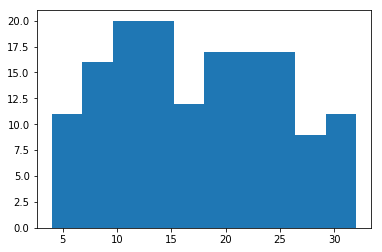

In [8]:
plt.hist(student['Number of classes present'])
plt.show()

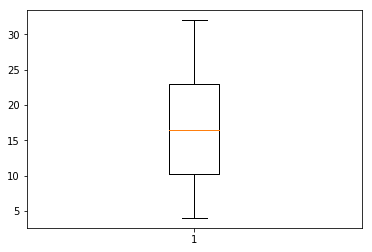

In [9]:
plt.boxplot(student['Number of classes present'])
plt.show()

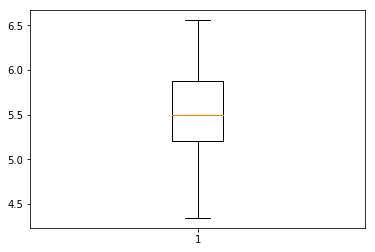

In [10]:
plt.boxplot(student['Number of hours studied'])
plt.show()

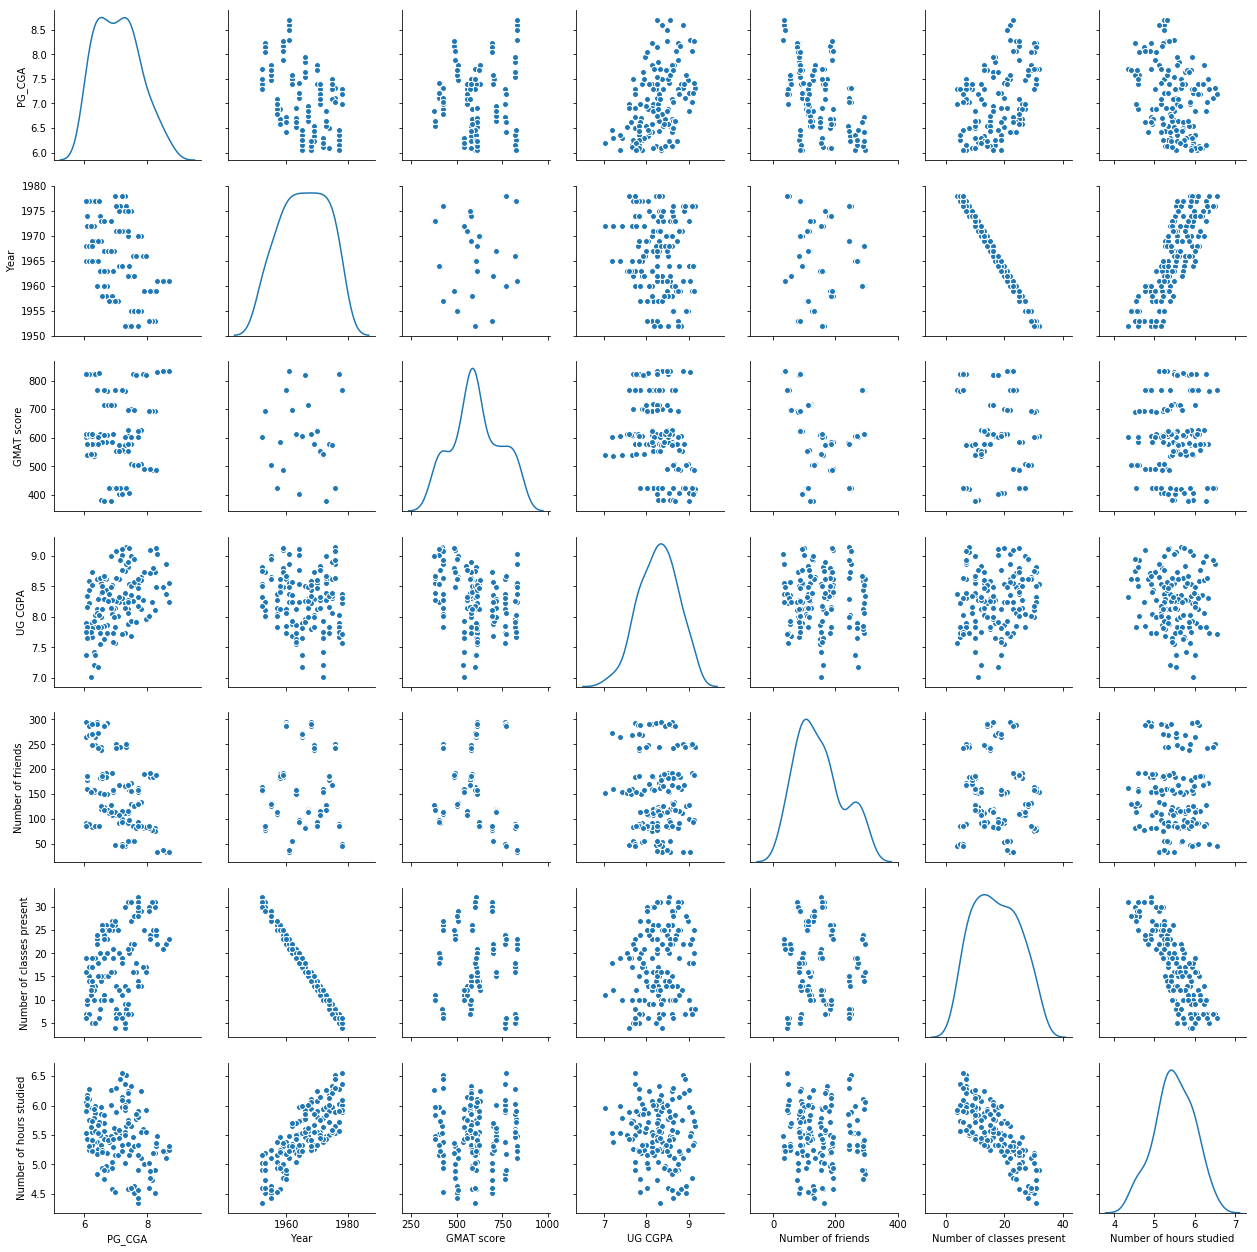

In [11]:
sns.pairplot(student,diag_kind='kde')
plt.show()

### find the which varible is best for the creating the model ....................

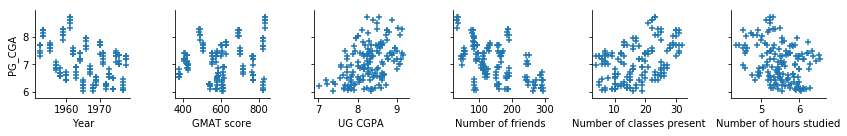

In [12]:
sns.pairplot(student,x_vars = ['Year','GMAT score','UG CGPA','Number of friends',
                              'Number of classes present','Number of hours studied'],y_vars = ['PG_CGA'],markers='+',size = 2)
plt.show()

#### find the corelation for which varible is best the................

In [13]:
corrs = student.corr()
corrs

,PG_CGA,Year,GMAT score,UG CGPA,Number of friends,Number of classes present,Number of hours studied
PG_CGA,1.000000,-0.428453,0.149223,0.442718,-0.553956,0.430445,-0.304735
Year,-0.428453,1.000000,0.017090,-0.174904,0.022377,-0.994839,0.815542
GMAT score,0.149223,0.017090,1.000000,-0.328864,-0.279612,-0.023920,0.033556
UG CGPA,0.442718,-0.174904,-0.328864,1.000000,-0.036063,0.171602,-0.133189
Number of friends,-0.553956,0.022377,-0.279612,-0.036063,1.000000,-0.022208,-0.019722
Number of classes present,0.430445,-0.994839,-0.023920,0.171602,-0.022208,1.000000,-0.813474
Number of hours studied,-0.304735,0.815542,0.033556,-0.133189,-0.019722,-0.813474,1.000000


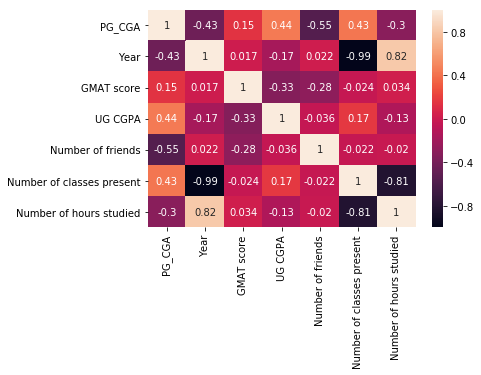

In [14]:
sns.heatmap(corrs,annot = True)
plt.show()

As is visible from the pairplot, the variable number of class present seems to be most correlated with pgcgpa. So let's go ahead and perform simple linear regression using number of classes present as our feature variable.
there are many varible are no colrealated.

selecting the varible like 

In [15]:
x = student[['Number of classes present']]

In [16]:
y = student[['PG_CGA']]

In [17]:
x

,Number of classes present
0,32
1,30
2,29
3,26
4,25
5,24
6,23
7,22
8,20
9,19


In [18]:
y

,PG_CGA
0,7.6950
1,8.2393
2,7.7858
3,6.9845
4,6.8772
5,8.2757
6,6.7188
7,8.5937
8,7.3880
9,6.9127


#  2 Train test split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

In [21]:
x_train.shape  ,  x_test.shape

((105, 1), (45, 1))

# 3 Start with SLR - which feature would you choose? build model, report R2 on train and test.

there is dependent varible is PG_cgpa and independent varible is number classes present

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
regression = LinearRegression()

In [24]:
regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
regression.coef_ , regression.intercept_

(array([[0.03246026]]), array([6.46366889]))

### creating the prediction for this varible 

In [26]:
y_pred = regression.predict(x_train)

In [27]:
y_pred

array([[7.1128741 ],
       [6.88565228],
       [6.7882715 ],
       [6.7882715 ],
       [7.17779462],
       [6.7882715 ],
       [7.04795358],
       [7.17779462],
       [7.27517541],
       [6.65843045],
       [7.14533436],
       [7.24271515],
       [6.69089071],
       [7.46993697],
       [6.65843045],
       [7.1128741 ],
       [7.24271515],
       [7.43747671],
       [6.7882715 ],
       [6.9505728 ],
       [6.98303306],
       [6.88565228],
       [7.43747671],
       [6.62597019],
       [6.98303306],
       [7.04795358],
       [6.75581123],
       [6.72335097],
       [6.9505728 ],
       [7.37255619],
       [7.30763567],
       [6.65843045],
       [6.62597019],
       [7.21025489],
       [6.85319202],
       [7.08041384],
       [6.69089071],
       [7.01549332],
       [7.40501645],
       [6.75581123],
       [7.27517541],
       [7.34009593],
       [6.75581123],
       [7.08041384],
       [7.08041384],
       [6.65843045],
       [6.91811254],
       [6.658

In [28]:
y_train

,PG_CGA
60,7.4094
116,7.7883
144,6.6367
119,6.8367
108,7.5880
69,6.6367
135,7.2094
56,6.4188
80,7.8757
123,6.4587


In [29]:
y_pred1 = regression.predict(x_test)

In [30]:
y_pred1

array([[6.91811254],
       [6.98303306],
       [7.17779462],
       [7.21025489],
       [7.17779462],
       [7.46993697],
       [6.88565228],
       [7.01549332],
       [7.46993697],
       [6.75581123],
       [7.08041384],
       [7.43747671],
       [6.69089071],
       [7.27517541],
       [6.9505728 ],
       [7.01549332],
       [7.27517541],
       [6.88565228],
       [6.7882715 ],
       [6.85319202],
       [6.69089071],
       [6.88565228],
       [6.59350993],
       [7.1128741 ],
       [7.40501645],
       [6.72335097],
       [6.82073176],
       [6.69089071],
       [6.7882715 ],
       [7.46993697],
       [7.04795358],
       [7.1128741 ],
       [7.34009593],
       [7.37255619],
       [7.14533436],
       [7.1128741 ],
       [6.82073176],
       [7.14533436],
       [7.08041384],
       [6.85319202],
       [6.98303306],
       [7.40501645],
       [6.88565228],
       [6.7882715 ],
       [7.1128741 ]])

In [31]:
y_test

,PG_CGA
114,6.1435
62,7.6443
33,7.4880
107,8.6937
7,8.5937
100,7.4950
40,6.3459
86,6.2518
76,8.1393
71,7.3920


### fiiting the model number classes present vs pg cgpa 

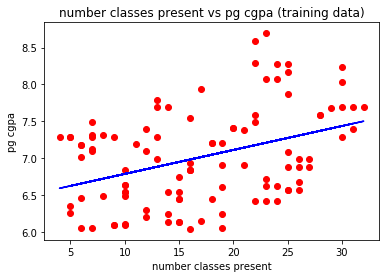

In [32]:
plt.scatter(x_train, y_train , color = 'red')
plt.plot(x_train,regression.predict(x_train),color = 'blue')
plt.title('number classes present vs pg cgpa (training data)')
plt.xlabel('number classes present')
plt.ylabel('pg cgpa')
plt.show()

###  find the r2 score the following model

In [33]:
from sklearn.metrics import r2_score

In [34]:
y_pred = regression.predict(x_train)

In [35]:
r2_score(y_train,y_pred)

0.1493331208378047

In [36]:
r2_score(y_test,y_pred1)

0.1771109006498196

# 4 Perform MLR - build a model with minimum number of variables necessary

In [37]:
corrs

,PG_CGA,Year,GMAT score,UG CGPA,Number of friends,Number of classes present,Number of hours studied
PG_CGA,1.000000,-0.428453,0.149223,0.442718,-0.553956,0.430445,-0.304735
Year,-0.428453,1.000000,0.017090,-0.174904,0.022377,-0.994839,0.815542
GMAT score,0.149223,0.017090,1.000000,-0.328864,-0.279612,-0.023920,0.033556
UG CGPA,0.442718,-0.174904,-0.328864,1.000000,-0.036063,0.171602,-0.133189
Number of friends,-0.553956,0.022377,-0.279612,-0.036063,1.000000,-0.022208,-0.019722
Number of classes present,0.430445,-0.994839,-0.023920,0.171602,-0.022208,1.000000,-0.813474
Number of hours studied,-0.304735,0.815542,0.033556,-0.133189,-0.019722,-0.813474,1.000000


there are many varible but such as negative value co related to predicted varible that's why selected the number classes present and gmat score 

In [38]:
x1 = student[['GMAT score','Number of classes present']] 

In [39]:
y1 = student[['PG_CGA']]

### train test split data

In [40]:
x1_train , x1_test , y1_train , y1_test = train_test_split(x1,y1,test_size = 0.3,random_state = 0)

In [41]:
x1_train.shape , x1_test.shape

((105, 2), (45, 2))

In [42]:
x1_train

,GMAT score,Number of classes present
60,407,20
116,626,13
144,378,10
119,377,10
108,698,22
69,381,10
135,403,18
56,767,22
80,490,25
123,826,6


### fitting the model 

In [43]:
regr = LinearRegression()

In [44]:
regr.fit(x1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
regr.intercept_  , regr.coef_

(array([6.40920664]), array([[8.70816687e-05, 3.25944665e-02]]))

### predicting the model

In [46]:
y_pred_train = regr.predict(x1_train)

In [47]:
y_pred_train

array([[7.09653821],
       [6.88744783],
       [6.76806818],
       [6.76798109],
       [7.18706791],
       [6.76832942],
       [7.03100095],
       [7.19307654],
       [7.26673832],
       [6.6767029 ],
       [7.15447344],
       [7.25817839],
       [6.68735278],
       [7.47197118],
       [6.6415219 ],
       [7.09636405],
       [7.23414385],
       [7.44721407],
       [6.76824234],
       [6.95141762],
       [6.983925  ],
       [6.88727367],
       [7.43937672],
       [6.64393427],
       [6.9929815 ],
       [7.04841728],
       [6.7526288 ],
       [6.72020849],
       [6.94863101],
       [7.36565378],
       [7.29349831],
       [6.67165216],
       [6.6437601 ],
       [7.22540976],
       [6.84710309],
       [7.08153424],
       [6.6872657 ],
       [7.03506787],
       [7.39842241],
       [6.7526288 ],
       [7.27501108],
       [7.32609278],
       [6.75254172],
       [7.08101175],
       [7.06394374],
       [6.671478  ],
       [6.91995521],
       [6.676

In [48]:
y_pred_test = regr.predict(x1_test)

In [49]:
y_pred_test

array([[6.91873607],
       [7.00238632],
       [7.18732915],
       [7.23133132],
       [7.19882393],
       [7.47214535],
       [6.88335499],
       [7.01608406],
       [7.47989562],
       [6.75280296],
       [7.08188257],
       [7.44738823],
       [6.70894904],
       [7.27501108],
       [6.96047411],
       [7.0348937 ],
       [7.26099093],
       [6.88335499],
       [6.78522326],
       [6.85494044],
       [6.68752695],
       [6.88727367],
       [6.60637615],
       [7.12205314],
       [7.41488085],
       [6.70644959],
       [6.80083681],
       [6.67420345],
       [6.78226249],
       [7.48015686],
       [7.06740109],
       [7.11447703],
       [7.33332056],
       [7.36574086],
       [7.16622947],
       [7.11421579],
       [6.81468279],
       [7.15482177],
       [7.08109883],
       [6.84858348],
       [7.00212507],
       [7.39859657],
       [6.88727367],
       [6.78200124],
       [7.09618988]])

### r2_score for train and test

In [50]:
from sklearn.metrics import r2_score

In [51]:
y_pred_train = regr.predict(x1_train)

#### r2_score for train

In [52]:
r2_score(y1_train,y_pred_train)

0.1496399943543424

#### r2_score for test

In [53]:
r2_score(y1_test,y_pred_test)

0.19200838004322007

# 5 We should be able to interpret and compare the effects of the individual variables